# Dense Coding In Continuous Variable Systems

In quantum information theory, dense coding is a quantum communication protocol to communicate a number of classical bits of information by only transmitting a smaller number of qubits. In this tutorial we are using dense coding in Continuous Vaiable system using dual channels.

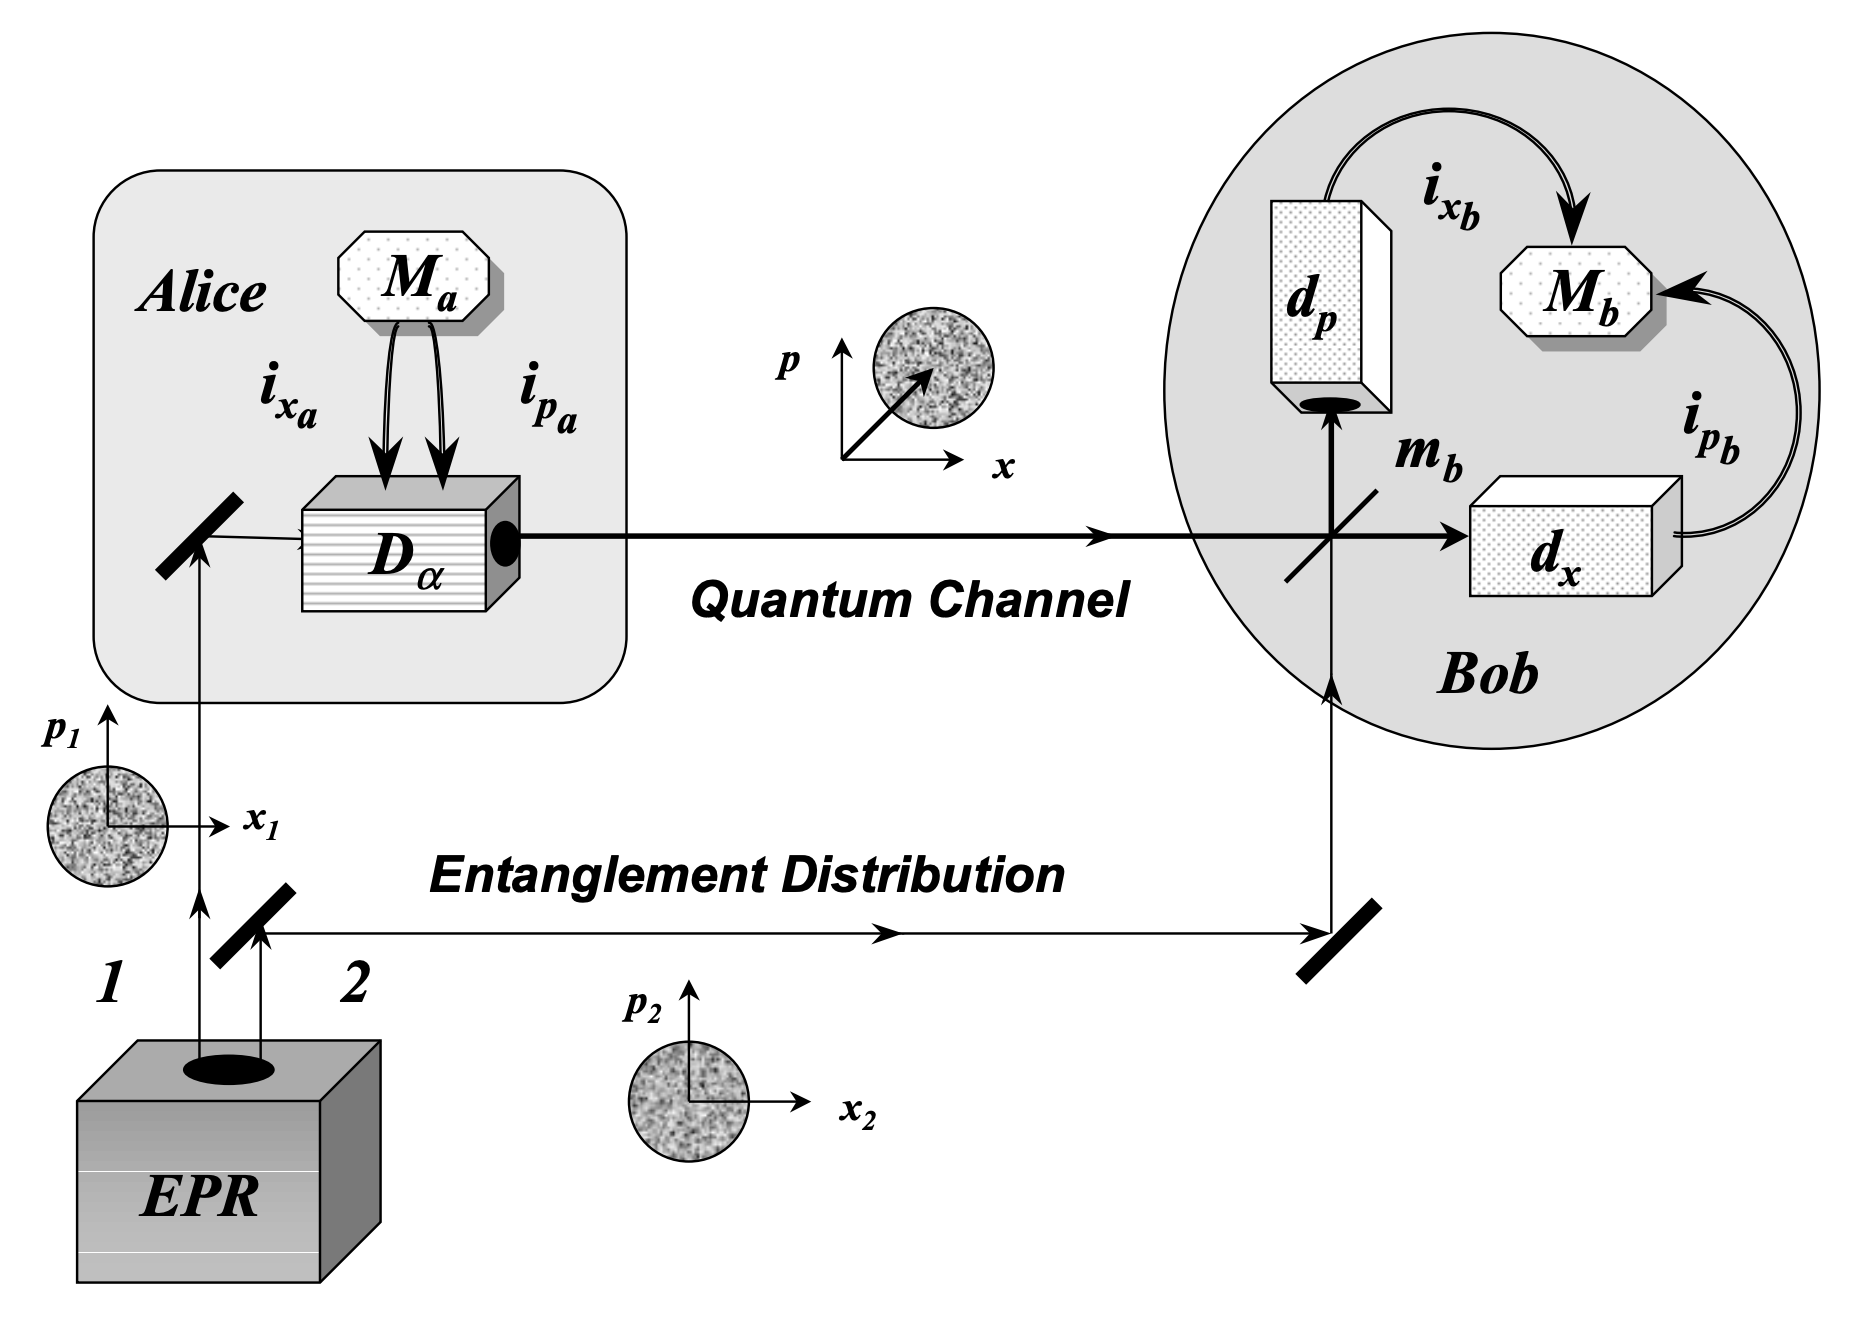
Fig. 1: Taken from, Braunstein, S. L., & Kimble, H. J. (2000). Dense coding for continuous variables. Physical Review A, 61, 042302

The setup is as shown in the above figure. A two-mode squeezed state of light is generated, with channel 1 passing to Alice and channel 2 being passed to BoB. In this process channel 2 is not disturbed at all. The classical message $\alpha_{in}$ is to sent by Alice using the Displacement operator $\widehat{D}(\alpha_{in})$. The displacement $\widehat{D}(\alpha_{in})$ can be implemented in a straightforward fashion by amplitude and phase offsets generated by the classical currents $(i_{x_\alpha}, i_{p_\alpha})$. Then the message is recovered by using the two channels as inputs in homodyne detection.

In [1]:
#Importing the necessary libraries
import numpy as np
import photonqat as pq

In [2]:
#The classical message to be sent (Displacement value)
alpha = 5+7j

#Squeezing parameter to be used to generate Two-mode squeezed state of light
r = 1

#Initializing the two channels
G = pq.Gaussian(2)

#Two-Mode Squeezed States
G.BS(0, 1, np.pi/4)
G.S(0, r)
G.S(1, -r)
G.BS(0, 1, -np.pi/4)

#Adding the message at the Alice's end
G.D(0, alpha)

#Peroforming Homodyne detection
G.BS(0, 1, np.pi/4)
G.MeasX(0)
G.MeasP(1)

G.run()

print(G.Creg(0, "x").read())
print(-G.Creg(1, "p").read())

4.933401814819717
7.353116073482574
